In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Random seed for reproducibility
seed = 202
np.random.seed(seed)

# Ignore warnings
import warnings
warnings.simplefilter('ignore')

# Garbage collector
import gc
gc.enable()

In [2]:
# Import the preprocessed dataframes
train_raw_df = pd.read_csv("preprocessed_train_v2(3).csv",
    dtype={'fullVisitorId': str}, nrows=None)
test_raw_df = pd.read_csv("preprocessed_test_v2(3).csv",
    dtype={'fullVisitorId': str}, nrows=None)
train_raw_df.shape, test_raw_df.shape

((1708337, 38), (401589, 38))

In [3]:
train_raw_df.head()

,channelGrouping,customDimensions,fullVisitorId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_isMobile,device_operatingSystem,...,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,3,2,3162355547410993243,1508198450,1,1508198450,77,0,False,23,...,67994,True,0.0,5,40,False,3298,3,3751,115
1,5,3,8934116514970143966,1508176307,6,1508176307,58,0,False,2,...,67994,True,0.0,5,40,False,3239,4,184,338
2,1,3,7992466427990357681,1508201613,1,1508201613,58,1,True,0,...,67994,True,0.0,5,40,True,3239,5,3751,0
3,3,2,9075655783635761930,1508169851,1,1508169851,58,0,False,23,...,67994,True,0.0,5,40,False,3239,3,3751,115
4,3,1,6960673291025684308,1508190552,1,1508190552,58,0,False,23,...,67994,True,0.0,5,40,False,3239,3,3751,115


### Convert visitStartTime to different data features

In [4]:
#MODIFIED
def expand_visit_start_time(df):
    df['full_date'] = pd.to_datetime(df['visitStartTime'], unit='s')
    df['date'] = df['full_date'].dt.date
    df['day_of_week'] = df['full_date'].dt.dayofweek
    df['hour_of_day'] = df['full_date'].dt.hour
    df['day_of_month'] = df['full_date'].dt.day
    df['week_of_year'] = df['full_date'].dt.weekofyear
    
    return df

##### add here new features

In [5]:
#MODIFIED
def feature_engineering(df):
    df = df.copy()
    # Based on : https://www.kaggle.com/qnkhuat/base-model-v2-with-with-full-features/edit
    
    #number of unique visitors per day of week (tells average amount of users per day of week)
    df['day_of_week_unique_user_count'] = df.groupby('day_of_week')['fullVisitorId'].transform('nunique')
    #number of unique visitors per week of year
    df['week_of_year_unique_user_count'] = df.groupby('week_of_year')['fullVisitorId'].transform('nunique')
    #number of unique visitors per month
    #df['month_unique_user_count'] = df.groupby('month')['fullVisitorId'].transform('nunique')
    #number of unique visitiors considering full date
    df['full_date_unique_user_count'] = df.groupby('full_date')['fullVisitorId'].transform('nunique')
    
    #IDEA
    #df['mean_hits_per_day'] = df.groupby(['day'])['totals_hits'].transform('mean')
    #df['sum_hits_per_day'] = df.groupby(['day'])['totals_hits'].transform('sum')
    
    df['sum_pageviews_per_country'] = df.groupby('geoNetwork_country')['totals_pageviews'].transform('sum')
    df['count_pageviews_per_country'] = df.groupby('geoNetwork_country')['totals_pageviews'].transform('count')
    df['mean_pageviews_per_country'] = df.groupby('geoNetwork_country')['totals_pageviews'].transform('mean')
    
    df['sum_pageviews_per_network_domain'] = df.groupby('geoNetwork_networkDomain')['totals_pageviews'].transform('sum')
    df['count_pageviews_per_network_domain'] = df.groupby('geoNetwork_networkDomain')['totals_pageviews'].transform('count')
    df['mean_pageviews_per_network_domain'] = df.groupby('geoNetwork_networkDomain')['totals_pageviews'].transform('mean')

    df['sum_pageviews_per_region'] = df.groupby('geoNetwork_region')['totals_pageviews'].transform('sum')
    df['count_pageviews_per_region'] = df.groupby('geoNetwork_region')['totals_pageviews'].transform('count')
    df['mean_pageviews_per_region'] = df.groupby('geoNetwork_region')['totals_pageviews'].transform('mean')
    
    df['sum_hits_per_network_domain'] = df.groupby('geoNetwork_networkDomain')['totals_hits'].transform('sum')
    df['count_hits_per_network_domain'] = df.groupby('geoNetwork_networkDomain')['totals_hits'].transform('count')
    df['mean_hits_per_network_domain'] = df.groupby('geoNetwork_networkDomain')['totals_hits'].transform('mean')

    df['sum_hits_per_region'] = df.groupby('geoNetwork_region')['totals_hits'].transform('sum')
    df['count_hits_per_region'] = df.groupby('geoNetwork_region')['totals_hits'].transform('count')
    df['mean_hits_per_region'] = df.groupby('geoNetwork_region')['totals_hits'].transform('mean')

    df['sum_hits_per_country'] = df.groupby('geoNetwork_country')['totals_hits'].transform('sum')
    df['count_hits_per_country'] = df.groupby('geoNetwork_country')['totals_hits'].transform('count')
    df['mean_hits_per_country'] = df.groupby('geoNetwork_country')['totals_hits'].transform('mean')
        
    #these are the most interesting columns, since they are referred to each single user (previous columns serve as a base to compute these ones)
    
    df['user_pageviews_sum'] = df.groupby('fullVisitorId')['totals_pageviews'].transform('sum')
    df['user_hits_sum'] = df.groupby('fullVisitorId')['totals_hits'].transform('sum')
    
    df['user_pageviews_count'] = df.groupby('fullVisitorId')['totals_pageviews'].transform('count')
    df['user_hits_count'] = df.groupby('fullVisitorId')['totals_hits'].transform('count')

    #Single attributes (not used for aggregation)
    
    df['user_totals_pageviews_mean']=df.groupby(['fullVisitorId'])['totals_pageviews'].transform('mean')
    df['user_totals_pageviews_max']=df.groupby(['fullVisitorId'])['totals_pageviews'].transform('max')
    df['user_totals_pageviews_min']=df.groupby(['fullVisitorId'])['totals_pageviews'].transform('min')
    
    df['user_totals_hits_mean']=df.groupby(['fullVisitorId'])['totals_hits'].transform('mean')
    df['user_totals_hits_max']=df.groupby(['fullVisitorId'])['totals_hits'].transform('max')
    df['user_totals_hits_min']=df.groupby(['fullVisitorId'])['totals_hits'].transform('min')
    
    #Aggregated features (always referred to users)
    
    df['user_pageviews_sum_to_mean'] = df['user_pageviews_sum'] / df['user_pageviews_sum'].mean()
    df['user_hits_sum_to_mean'] = df['user_hits_sum'] / df['user_hits_sum'].mean()

    df['user_pageviews_to_region'] = df['user_pageviews_sum'] / df['mean_pageviews_per_region']
    df['user_hits_to_region'] = df['user_hits_sum'] / df['mean_hits_per_region']
    
    df['user_pageviews_to_country'] = df['user_pageviews_sum'] / df['mean_pageviews_per_country']
    df['user_hits_to_country'] = df['user_hits_sum'] / df['mean_hits_per_country']
    
    df['user_pageviews_to_network_domain'] = df['user_pageviews_sum'] / df['mean_pageviews_per_network_domain']
    df['user_hits_to_network_domain'] = df['user_hits_sum'] / df['mean_hits_per_network_domain']    
    
    #Importare il dataset originale, calcolare la somma e la media di acquisto per i 62 giorni precedenti all'inizio del 
    #training set, poi per 31 giorni (TODO: fissare a zero se la data non è presente nel test)
    
    
    # Drop date column
    df.drop(['full_date'], axis=1, inplace=True)
    df.drop(['visitStartTime'], axis=1, inplace=True)
    
    return df

In [6]:
def apply_feature_engineering(df):
    
    df = expand_visit_start_time(df)
    df = feature_engineering(df)
     
    return df

### Checkpoint

In [7]:
train_df = apply_feature_engineering(train_raw_df)
test_df = apply_feature_engineering(test_raw_df)
train_df.shape, test_df.shape

((1708337, 81), (401589, 81))

In [8]:
train_df.head()

,channelGrouping,customDimensions,fullVisitorId,visitId,visitNumber,device_browser,device_deviceCategory,device_isMobile,device_operatingSystem,geoNetwork_city,...,user_totals_hits_max,user_totals_hits_min,user_pageviews_sum_to_mean,user_hits_sum_to_mean,user_pageviews_to_region,user_hits_to_region,user_pageviews_to_country,user_hits_to_country,user_pageviews_to_network_domain,user_hits_to_network_domain
0,3,2,3162355547410993243,1508198450,1,77,0,False,23,1012,...,1,1,0.064344,0.052951,0.293932,0.246818,0.374207,0.323974,0.250851,0.207741
1,5,3,8934116514970143966,1508176307,6,58,0,False,2,255,...,30,2,4.053675,4.342006,11.237876,12.010351,12.557370,13.403325,15.803630,17.034752
2,1,3,7992466427990357681,1508201613,1,58,1,True,0,1012,...,2,2,0.128688,0.105903,0.587864,0.493636,0.398647,0.326910,1.500000,1.428571
3,3,2,9075655783635761930,1508169851,1,58,0,False,23,1012,...,2,2,0.128688,0.105903,0.587864,0.493636,1.048326,0.925890,0.501703,0.415482
4,3,1,6960673291025684308,1508190552,1,58,0,False,23,1012,...,2,2,0.128688,0.105903,0.587864,0.493636,0.773481,0.664004,0.857303,0.746634


In [9]:
"""test_start_date = min(test_df.date)
test_end_date = max(test_df.date)

test_label_start_date = pd.to_datetime("2018-12-01").date()
test_label_end_date = pd.to_datetime("2019-01-31").date()

missing_days = (test_label_start_date - test_end_date).days
prediction_span = (test_label_end_date - test_label_start_date).days + 1

print("There is a gap of %d days between the last day of our dataset and the prediction" % missing_days)
print("We have to predict %d days after this gap" % prediction_span)"""

'test_start_date = min(test_df.date)\ntest_end_date = max(test_df.date)\n\ntest_label_start_date = pd.to_datetime("2018-12-01").date()\ntest_label_end_date = pd.to_datetime("2019-01-31").date()\n\nmissing_days = (test_label_start_date - test_end_date).days\nprediction_span = (test_label_end_date - test_label_start_date).days + 1\n\nprint("There is a gap of %d days between the last day of our dataset and the prediction" % missing_days)\nprint("We have to predict %d days after this gap" % prediction_span)'

In [10]:
#NEW

def apply_retrospective_features(df, retro_df, time):
    df = df.copy()
    retro_df = retro_df.copy()
    
    #dynamic column naming
    col_1 = 'sum_user_revenue_{}_days'.format(time)
    col_2 = 'mean_user_revenue_{}_days'.format(time)
    
    #make calculations to replace columns
    retro_df[col_1] = df.groupby(['fullVisitorId'])['totals_transactionRevenue'].transform('sum')
    retro_df[col_2] = df.groupby(['fullVisitorId'])['totals_transactionRevenue'].transform('mean')
    
    #initialize columns to zero
    df[col_1] = 0
    df[col_2] = 0
    
    #support array
    df_fullVIsitorIds = np.unique(df['fullVisitorId'])
    
    #replacement based on fullVisitorId
    for user in np.unique(retro_df['fullVisitorId']):
        if user == any(df_fullVIsitorIds):
            df.loc[df['fullVisitorId'] == user, col_1] = retro_df.loc[retro_df['fullVisitorId'] == user, col_1].iloc[0]
            df.loc[df['fullVisitorId'] == user, col_2] = retro_df.loc[retro_df['fullVisitorId'] == user, col_2].iloc[0]
    
    return df

In [11]:
train_start = pd.to_datetime("2017-05-01").date()
train_end = pd.to_datetime("2017-10-16").date()

train_label_start = pd.to_datetime("2017-12-01").date()
train_label_end = pd.to_datetime("2018-01-31").date()

In [19]:
#MODIFIED
from datetime import timedelta

#used to define retrospective features
long_time = 62
medium_time = 31


temp_train = train_df[(train_df['date'].values <= train_end) & (train_df['date'].values >= train_start)]
temp_train_label = train_df[(train_df['date'].values <= train_label_end) & (train_df['date'].values >= train_label_start)]

retro_train_long = train_df[(train_df['date'].values <= train_start) & (train_df['date'].values >= train_start - timedelta(long_time))]
retro_train_medium = train_df[(train_df['date'].values <= train_start) & (train_df['date'].values >= train_start - timedelta(medium_time))]

#last two features (scorporated for brevity)
temp_train = apply_retrospective_features(temp_train, retro_train_long, 62)
temp_train_label = apply_retrospective_features(temp_train_label, retro_train_long, 62)

temp_train_label = apply_retrospective_features(temp_train_label, retro_train_medium, 31)
temp_train = apply_retrospective_features(temp_train, retro_train_medium, 31)


temp_train.shape, temp_train_label.shape, retro_train_long.head()

((427826, 85),
 (180572, 85),
        channelGrouping  customDimensions        fullVisitorId     visitId  \
 13084                4                 0  6018775317735347795  1489384596   
 13085                3                 5  4502602144434229509  1489386442   
 13086                1                 3  1047720525322501048  1489321740   
 13087                3                 0  2980931954171389805  1489330188   
 13088                3                 0  3426870913361457794  1489336822   
 
        visitNumber  device_browser  device_deviceCategory  device_isMobile  \
 13084           61              58                      0            False   
 13085            1              58                      0            False   
 13086            1              58                      1             True   
 13087            1             131                      0            False   
 13088            3              77                      0            False   
 
        device_operating

In [20]:
#check new column(s) consistency
#only 82 entries are 
new_column = temp_train['sum_user_revenue_62_days']
len(np.unique(new_column[~np.isnan(new_column)]))

1

In [21]:
# Create a dataframe containing only couples of fullvisitorid and totaltransactionrevenue when the latter is not null
def zip_df_on_revenue(df):
    fullID = []
    not_null_transactions = []
    for row in df.itertuples():
        if(row.totals_transactionRevenue > 0):
            fullID.append(row.fullVisitorId)
            not_null_transactions.append(row.totals_transactionRevenue)
    temp_df = pd.DataFrame({'fullVisitorId': fullID})
    not_null_transactions_temp_df = pd.DataFrame({'totals_transactionRevenue': not_null_transactions})
    temp_df = temp_df.join(not_null_transactions_temp_df)
    return temp_df

In [22]:
zipped_label = zip_df_on_revenue(temp_train_label)
zipped_label.shape

(1405, 2)

In [23]:
%%time
label = []

for user in temp_train['fullVisitorId']:
    temp = 0
    for record in zipped_label.itertuples():
        if (record.fullVisitorId == user):
            temp += record.totals_transactionRevenue
    label.append(temp)
label

CPU times: user 15min, sys: 5.86 s, total: 15min 6s
Wall time: 15min 17s


In [24]:
temp_train = temp_train.reset_index(drop=True) # Important!

temp_label = pd.DataFrame({'label': label})
temp_label = temp_label.reset_index(drop=True) # Important!

temp_train = temp_train.join(temp_label)

temp_train.head()

,channelGrouping,customDimensions,fullVisitorId,visitId,visitNumber,device_browser,device_deviceCategory,device_isMobile,device_operatingSystem,geoNetwork_city,...,user_hits_to_region,user_pageviews_to_country,user_hits_to_country,user_pageviews_to_network_domain,user_hits_to_network_domain,sum_user_revenue_62_days,mean_user_revenue_62_days,sum_user_revenue_31_days,mean_user_revenue_31_days,label
0,5,3,8934116514970143966,1508176307,6,58,0,False,2,255,...,12.010351,12.557370,13.403325,15.803630,17.034752,0,0,0,0,15990000.0
1,3,2,9075655783635761930,1508169851,1,58,0,False,23,1012,...,0.493636,1.048326,0.925890,0.501703,0.415482,0,0,0,0,0.0
2,3,1,6960673291025684308,1508190552,1,58,0,False,23,1012,...,0.493636,0.773481,0.664004,0.857303,0.746634,0,0,0,0,0.0
3,5,3,0166277907528479249,1508196701,1,58,0,False,7,857,...,1.318209,1.793910,1.471097,2.257661,1.869668,0,0,0,0,0.0
4,5,2,8349655975937271469,1508152478,1,58,0,False,7,530,...,0.663157,0.814172,0.716686,0.501703,0.415482,0,0,0,0,0.0


In [25]:
for i in temp_train_label.itertuples():
    if i.fullVisitorId == '8934116514970143966':
        print(i.totals_totalTransactionRevenue)

22990000.0


### Data preparation for catboost

In [26]:
temp_train.columns

Index(['channelGrouping', 'customDimensions', 'fullVisitorId', 'visitId',
       'visitNumber', 'device_browser', 'device_deviceCategory',
       'device_isMobile', 'device_operatingSystem', 'geoNetwork_city',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim',
       'totals_timeOnSite', 'totals_totalTransactionRevenue',
       'totals_transactionRevenue', 'totals_transactions',
       'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.isVideoAd',
       'trafficSource_adwordsClickInfo.page',
       'trafficSource_adwordsClickInfo.slot', 'trafficSource_campaign',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 

In [27]:
#MODIFIED


#cont_features = ['totals_hits', 'totals_pageviews', 'visitNumber']
cont_features = []

bool_features = []

cat_features = ['fullVisitorId',
                'customDimensions',
#                 'visitId',
                'channelGrouping', 
                'device_browser', 
                'device_deviceCategory',
                'device_operatingSystem', 
                'geoNetwork_continent',
                'geoNetwork_subContinent', 
                'trafficSource_medium', 
                'geoNetwork_country', 
                'geoNetwork_metro', 
                'geoNetwork_city', 
                'geoNetwork_region',
                'geoNetwork_networkDomain',
                'trafficSource_source', 
                'day_of_week', 
                'hour_of_day', 
                'day_of_month',
                'week_of_year', 
                'trafficSource_adContent', 
                'trafficSource_adwordsClickInfo.adNetworkType', 
                'trafficSource_adwordsClickInfo.gclId',
                'trafficSource_adwordsClickInfo.page', 
                'trafficSource_adwordsClickInfo.slot', 
                'trafficSource_keyword', 
                'trafficSource_referralPath',
                'trafficSource_campaign'
                #ex booleans
#                 'device_isMobile', 
#                 'trafficSource_isTrueDirect', 
#                 'trafficSource_adwordsClickInfo.isVideoAd', 
#                 'totals_bounces', 
#                 'totals_newVisits'
               ]

for col_name in list(temp_train):
    if col_name not in cat_features and col_name != 'date' and col_name != 'label':
        cont_features.append(col_name)
        
print(cont_features)

['visitId', 'visitNumber', 'device_isMobile', 'totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim', 'totals_timeOnSite', 'totals_totalTransactionRevenue', 'totals_transactionRevenue', 'totals_transactions', 'trafficSource_adwordsClickInfo.isVideoAd', 'trafficSource_isTrueDirect', 'day_of_week_unique_user_count', 'week_of_year_unique_user_count', 'full_date_unique_user_count', 'sum_pageviews_per_country', 'count_pageviews_per_country', 'mean_pageviews_per_country', 'sum_pageviews_per_network_domain', 'count_pageviews_per_network_domain', 'mean_pageviews_per_network_domain', 'sum_pageviews_per_region', 'count_pageviews_per_region', 'mean_pageviews_per_region', 'sum_hits_per_network_domain', 'count_hits_per_network_domain', 'mean_hits_per_network_domain', 'sum_hits_per_region', 'count_hits_per_region', 'mean_hits_per_region', 'sum_hits_per_country', 'count_hits_per_country', 'mean_hits_per_country', 'user_pageviews_sum', 'user_hits_sum', 'use

In [28]:
train = temp_train[cont_features + bool_features + cat_features]
train_y = temp_train['label'].values
log_y = np.log1p(train_y)

In [29]:
#check if we took all the features except totals_totalTransactionRevenue (yep!)
for c in temp_train.columns:
    if c not in train.columns:
        print(c)

date
label


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, log_y, train_size=0.85, random_state=seed)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((363652, 84), (64174, 84), (363652,), (64174,))

### Feature ranking with catboost

In [31]:
#generate categorical column indices dinamically
cat_positions = []
for i in cat_features:
    cat_positions.append(train.columns.get_loc(i))
cat_positions

[57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83]

In [32]:
#%%time
#from catboost import CatBoostRegressor

# necessary for feature importance ranking
# pool = Pool(train, log_y)


#fit catboost regressor
#cat = CatBoostRegressor(
#    random_seed = seed,
#    loss_function = 'RMSE',
#    eval_metric = 'RMSE',
#    logging_level='Silent',
    #task_type = 'GPU'
#)


#cat.fit(train, log_y,
#        cat_features = cat_positions
#       )

In [33]:
%%time
from catboost import CatBoostRegressor
from catboost import Pool 

# necessary for feature importance ranking
pool = Pool(train, log_y, cat_features = cat_positions)


#fit catboost regressor
cat = CatBoostRegressor(
    random_seed = seed,
    loss_function = 'RMSE',
    eval_metric = 'RMSE',
    logging_level='Silent',
    #task_type = 'GPU'
)


cat.fit(pool)


Iteration with suspicious time 2.98e+03 sec ignored in overall statistics.


CPU times: user 1h 59min 8s, sys: 10min 4s, total: 2h 9min 13s
Wall time: 1h 29min 53s


### Inspect features inside the model

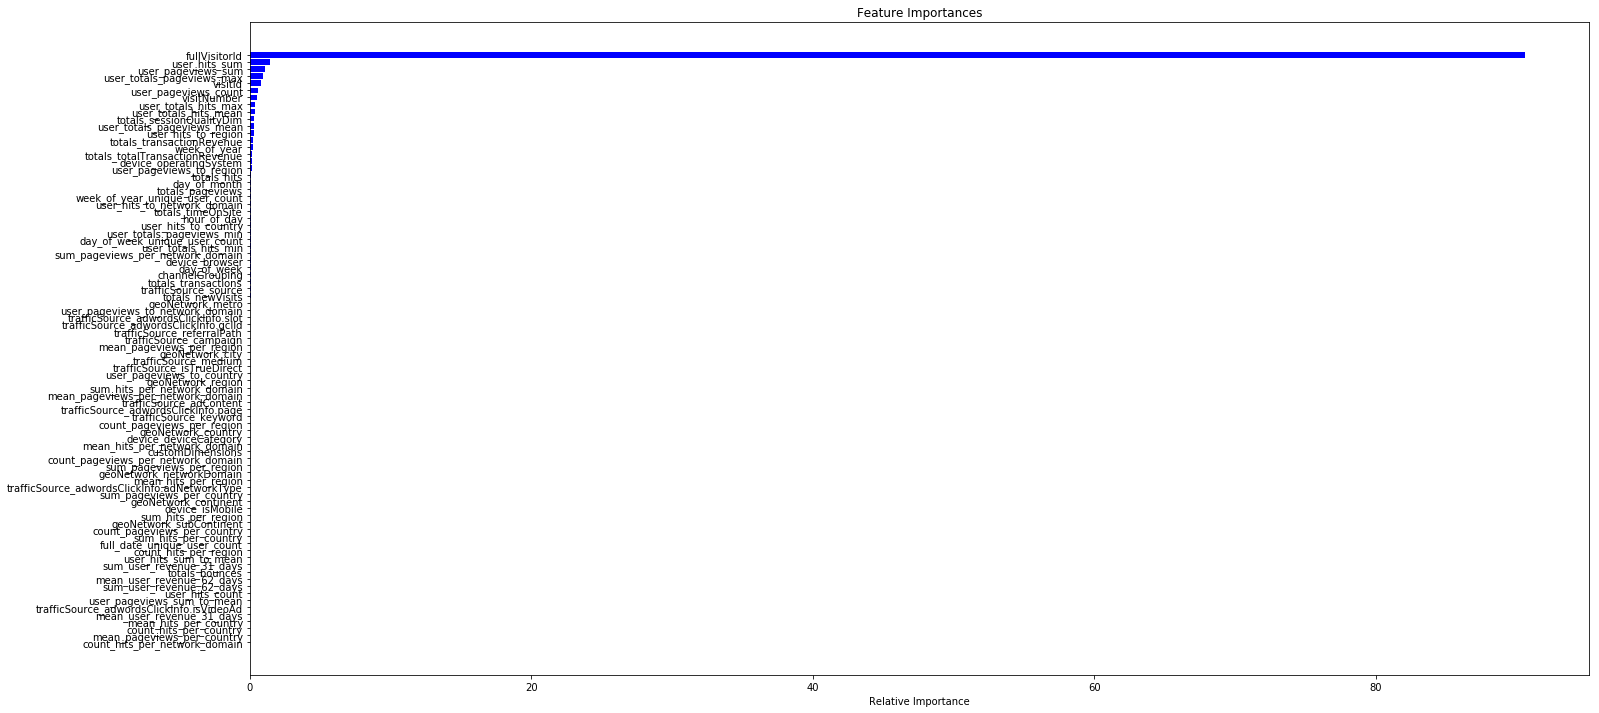

In [34]:
# get features importance ranking
# the individual importance values for each of the input features
features = train.columns
importances = np.asarray(cat.get_feature_importance(pool, fstr_type='FeatureImportance'))
indices = np.argsort(importances)# top features
plt.figure(figsize=(24, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

for i in train_df.columns:    
    if len(train_df[i].unique()) <= 100:
        print(i + '\n')
        print(train_df[i].unique())
        print('\n')

In [35]:
import shap

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(cat)
shap_values = explainer.shap_values(train)

ModuleNotFoundError: No module named 'shap'

### Export Dataframes

In [ ]:
train_df.to_csv('featured_train(4).csv', index = False)
test_df.to_csv('featured_test(4).csv', index = False)